# Assignment - 6

## Q1

In [728]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## a)

In [654]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

In [666]:
def NaiveBayesClassifier(X_train, y_train, X_test):
    vals = []
    uniques, counts = np.unique(y_train, return_counts=True)
    for j in uniques:
        vals.append([])
        for i in range(X.shape[1]):
            mean = np.mean(X_train[y_train == j][:, i])
            var = np.var(X_train[y_train == j][:, i])
            vals[-1].append(np.array([mean, var]))

    y_pred = []
    all_probs = []
    for i in X_test:
        probs = []
        for j in range(len(uniques)):
            prob = counts[j] * np.prod(np.array([np.exp(-((i[k] - vals[j][k][0])**2)/(2*(vals[j][k][1])**2)) for k in range(len(vals[0][0]))]))
            probs.append(prob)
        all_probs.append(probs)
        y_pred.append(uniques[np.argmax(np.array(probs/max(probs)))])
    return np.array(y_pred), all_probs

In [706]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 89, test_size = 0.3)

In [707]:
y_pred, probs = NaiveBayesClassifier(X_train, y_train, X_test)

In [708]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9555555555555556


## b)

### i)

In [729]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 15, test_size = 0.9)
X_pool, X_test, y_pool, y_test = train_test_split(X_test, y_test, random_state = 2, train_size = 0.63)
y_pred, probs = NaiveBayesClassifier(X_train, y_train, X_pool)
acc = accuracy_score(y_pred, y_pool)
print(acc)

0.4588235294117647


/home/gowtham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars



In [730]:
al = []
for i in range(10):
    
    y_pred, probs = NaiveBayesClassifier(X_train, y_train, X_pool)
    y_pred_test, probs_t = NaiveBayesClassifier(X_train, y_train, X_test)
    
    print(i, accuracy_score(y_test, y_pred_test))
    al.append(accuracy_score(y_test, y_pred_test))
    probs = np.array([np.var(j) for j in probs])
#     print(probs)
    index = np.argmin(probs)
#     print(index)
    X_train = np.append(X_train, [X_pool[index]], axis = 0)
    y_train = np.append(y_train, [y_pool[index]], axis = 0)
    X_pool = np.append(X_pool[:index, :], X_pool[index+1:, :], axis = 0)
    y_pool = np.delete(y_pool, index)

0 0.42
1 0.44
2 0.56
3 0.56
4 0.56
5 0.86
6 0.86
7 0.86
8 0.86
9 0.86


/home/gowtham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

/home/gowtham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars



### iii)

In [722]:
randoms = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 15, test_size = 0.9)
    X_pool, X_test, y_pool, y_test = train_test_split(X_test, y_test, random_state = 2,train_size = 0.63)
    rl = []
    for i in range(10):
        y_pred_test, probs_t = NaiveBayesClassifier(X_train, y_train, X_test)

        index = np.random.randint(len(X_pool))
#         print(i, accuracy_score(y_test, y_pred_test))
        rl.append(accuracy_score(y_test, y_pred_test))
        probs = np.array([np.var(j) for j in probs])
        X_train = np.append(X_train, [X_pool[index]], axis = 0)
        y_train = np.append(y_train, [y_pool[index]], axis = 0)
        X_pool = np.append(X_pool[:index, :], X_pool[index+1:, :], axis = 0)
        y_pool = np.delete(y_pool, index)
    randoms.append(np.array(rl))
randoms = np.array(randoms)
rl = randoms[0]

for j in range(1, len(randoms)):
    rl = rl + randoms[j]
rl = rl/5
rl

/home/gowtham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

/home/gowtham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars



array([0.42 , 0.584, 0.62 , 0.636, 0.692, 0.696, 0.724, 0.724, 0.796,
       0.816])

In [723]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = list(range(10)),
    y = al,
    mode = 'lines',
    name = 'Active Learning'
)

trace1 = go.Scatter(
    x = list(range(10)),
    y = rl,
    mode = 'lines',
    name = 'Random Sampling'
)

data = [trace0, trace1]
layout = dict(title = 'Active Learning & Random Sampling',
              xaxis = dict(title = 'Iteration'),
              yaxis = dict(title = 'accuracy'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### ii)

In [724]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0 0.68


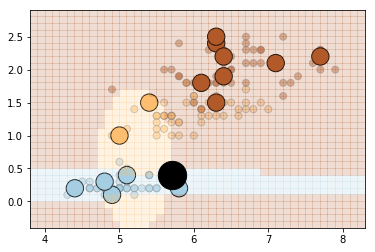

1 0.68


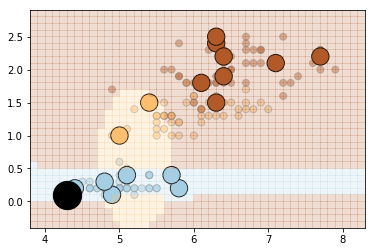

2 0.68


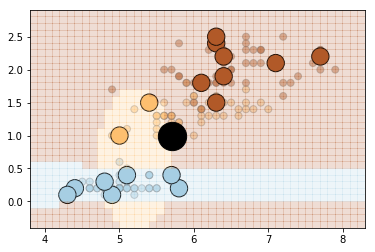

3 0.76


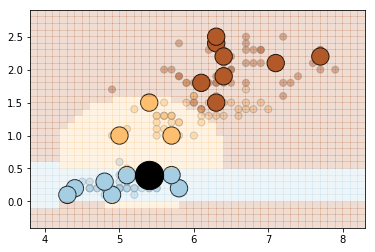

4 0.76


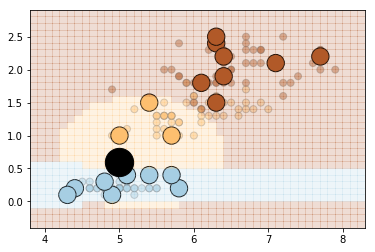

5 0.78


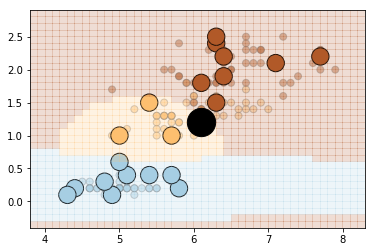

6 0.82


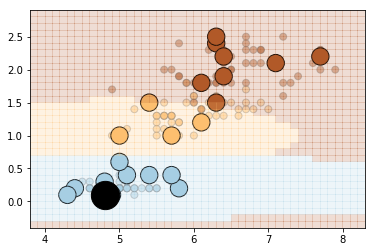

7 0.82


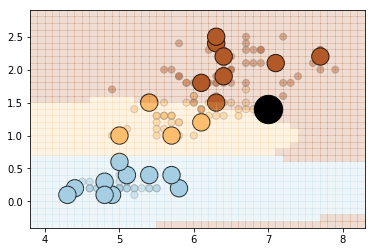

8 0.86


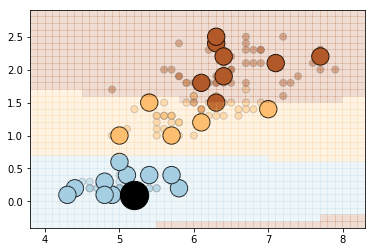

9 0.86


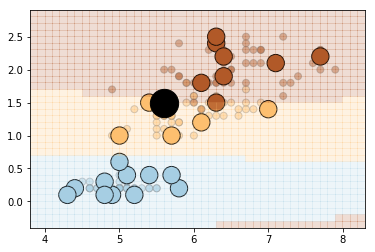

10 0.9


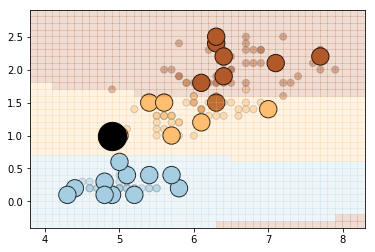

11 0.88


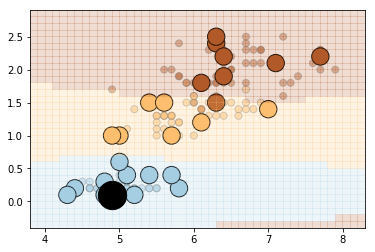

12 0.88


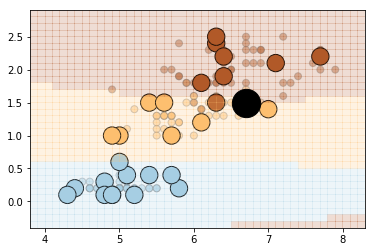

13 0.9


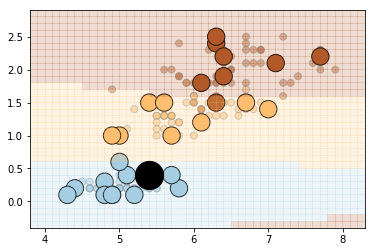

14 0.9


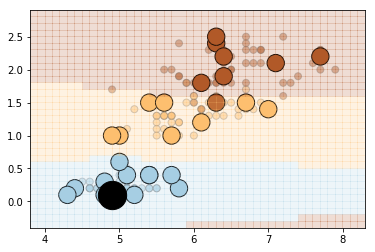

15 0.9


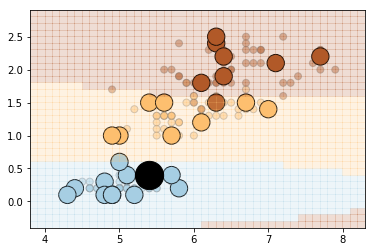

16 0.9


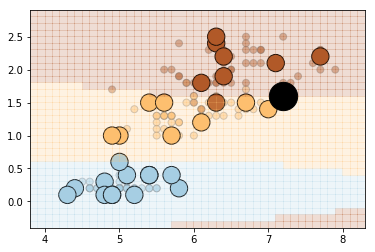

17 0.86


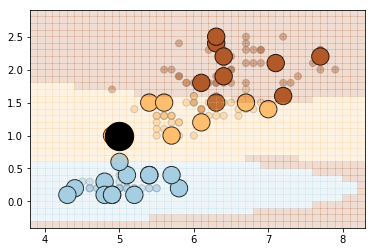

18 0.86


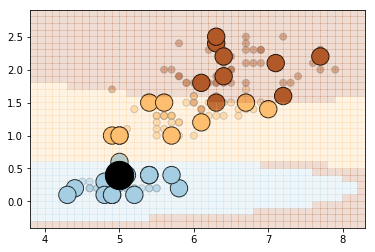

19 0.86


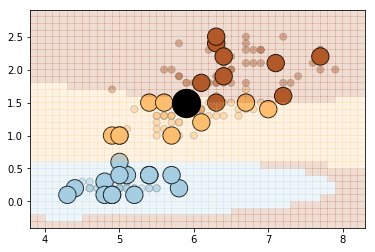

20 0.88


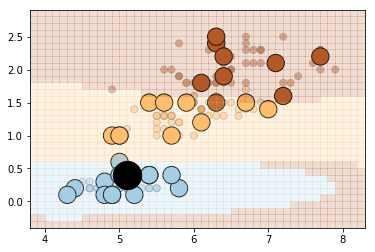

21 0.88


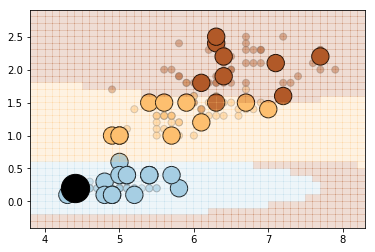

22 0.88


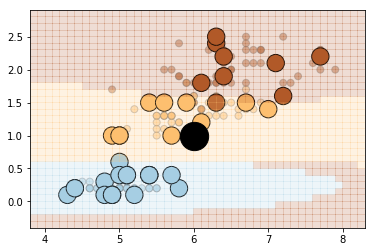

23 0.86


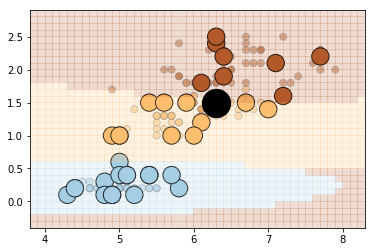

24 0.88


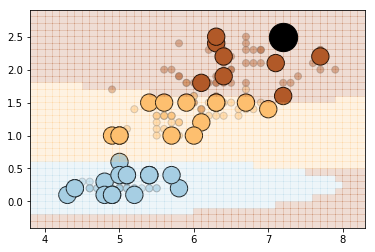

In [745]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 22, test_size = 0.9)
X_pool, X_test, y_pool, y_test = train_test_split(X_test, y_test, random_state = 23, train_size = 0.63)


for i in range(25):
    
    y_pred, probs = NaiveBayesClassifier(X_train, y_train, X_pool)
    y_pred_test, probs_t = NaiveBayesClassifier(X_train, y_train, X_test)
    
    print(i, accuracy_score(y_test, y_pred_test))
    al.append(accuracy_score(y_test, y_pred_test))
    probs = np.array([np.var(j) for j in probs])
#     print(probs)
    index = np.argmin(probs)
#     print(index)
    
    x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
    y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z, p = NaiveBayesClassifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.4, cmap=plt.cm.Paired, edgecolors='grey', s = 50 )
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, 
                edgecolors='k', s=300, cmap=plt.cm.Paired )
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X_pool[index][0], X_pool[index][1], c = 'k', 
                edgecolors = 'k', s = 800, cmap = plt.cm.Paired )
    plt.savefig(str(i) + '.png')
    plt.show()
    
    
    X_train = np.append(X_train, [X_pool[index]], axis = 0)
    y_train = np.append(y_train, [y_pool[index]], axis = 0)
    X_pool = np.append(X_pool[:index, :], X_pool[index+1:, :], axis = 0)
    y_pool = np.delete(y_pool, index)

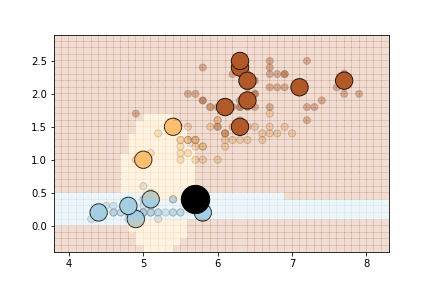

In [746]:
import os
os.system('convert * .png out.gif'.format('result.gif'))
from IPython.display import Image
Image(filename='out.gif') 